In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Trial - 1 

Epochs = 80

Batch Size = 4/6/8

#### ICC Network
Learning Rate = 0.00001

Weight_decay = 0.00001

Momentum = 0.9

Loss Function = 1000.0 \* MSELoss(GT_Density, Density) + 0.01 \* MSELoss(GT_Density_Small, Density_Small)

Optimizer = SGD

#### SRGAN
Alpha = 2

Generator Loss Function = 0.01 \* (image_loss + 0.001 \* adversarial_loss + 0.006 \* perception_loss) + density_loss

where, image_loss is MSE Loss between new image and original image

perception_loss is MSE Loss for VGG features

Optimizer = Adam


Server - BigCortex

GPU Memory - 12GB


#### Result 

Out of memory exception during epoch 1.

Fix - Reduced batch size to 2. No out of memory exception for batch size 1 and 2.

Memory usage during training = 7.1GB

### Trial - 2

Same Configuration as Trial - 1

Batch Size = 2


#### Result 

Out of memory exception while calculating MSE/MAE on validation data.

Fix - Optimized code for validation data especially reused all the variables to free up memory.

Memory usage during training and validation = 11.5GB

### Trial - 3 

Same Configuration as Trial - 2

#### Result 

Result - MAE/MSE not reducing at all.

Best Epoch = 5 (calculated at interval of 5)

Best MSE = 432.6

Best MAE = 558.5

Total Time taken for training = 2.5 hrs

#### Fixing and Analysis of problem

1. Verified the code. 
2. Ran the model for 300 epochs to see if the loss is decreasing. Below are the plots
3. Memory shoots up during initialization of the data loader. Although images are getting read one by one still it is overshooting. May be with using global variable can limit the memory usage.

Total Time taken = 14 hrs

(Disabled validation for MAE/MSE during this time since, running model on validation data and saving the best model takes around 2mins which adds an overheard during debugging.)

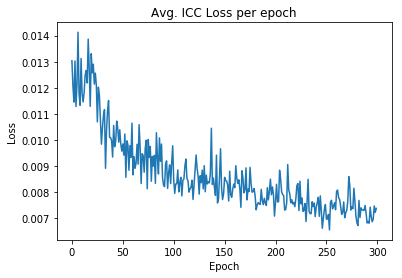

In [2]:
N_Loss = [0.013036805647340468, 0.012072429532224002, 0.011452354304492474, 0.013029165324987844, 0.011284033376335477, 0.012157669931766577, 0.014129958628521611, 0.011794861717886912, 0.011329365922526147, 0.013125996927556116, 0.011764428649136486, 0.011457596806382449, 0.011827665484064104, 0.012479802375116075, 0.01266638049938289, 0.012184560394962319, 0.013865179335844004, 0.012718296460031222, 0.011290842487554376, 0.013306182529195212, 0.01257204735011328, 0.012907351821583386, 0.012140843872718203, 0.012563532014222195, 0.012098654192717126, 0.010694876604247838, 0.012023309974271494, 0.011702359797782265, 0.0107504901245314, 0.009839872341641846, 0.010464011273773697, 0.010950003291169802, 0.011163892215311838, 0.008915853710107816, 0.010361404542539579, 0.011116972976208976, 0.01150957921151227, 0.010106260676887663, 0.010089813199204703, 0.009969818391934192, 0.009346816800340699, 0.010556630723197789, 0.00974215815309435, 0.00995740923593985, 0.010725351100942741, 0.010461296496990447, 0.009916462948895059, 0.010391911140468437, 0.00985090733806525, 0.009574031905891995, 0.009848580715091279, 0.009419753819820471, 0.010228806058488166, 0.008569683780757866, 0.00997026047591741, 0.009826069769818181, 0.008841508425733386, 0.009781330436914383, 0.009337624313581424, 0.01064599968706413, 0.00866463182096292, 0.009367581505600053, 0.00891725819494847, 0.00910774875068455, 0.009836631682313357, 0.009074808293371461, 0.010585668162093498, 0.009731382380511302, 0.008331988784387552, 0.009473228151715982, 0.009400831088714767, 0.008765546266901462, 0.009674930015947514, 0.009990683673046685, 0.008131709043324614, 0.010019437025572795, 0.00934034161172652, 0.009749813539092428, 0.008419882567832247, 0.00936920882736255, 0.0089997401041425, 0.009412908816108635, 0.008338850645717079, 0.010279641928500496, 0.009338528831819227, 0.008697812342579709, 0.010080993624869734, 0.009182134792790748, 0.009843519214288486, 0.008564949051651638, 0.008278994154243264, 0.008210208606809223, 0.009079240539091794, 0.009200045337347546, 0.008145233456064792, 0.008742984650695385, 0.009047159741894574, 0.008330428374708087, 0.009124058583305061, 0.00977826004071782, 0.008465218092896975, 0.00795491777525361, 0.008315317429466328, 0.00832144061132567, 0.008854417455780398, 0.008009515754529274, 0.00836926493619103, 0.008569450042947816, 0.007857721555240763, 0.008454079526127317, 0.008501258652540856, 0.009001644081727135, 0.009271543416689383, 0.008519107270791816, 0.008445935956163643, 0.008001484971124835, 0.00812706557563312, 0.008185242719337111, 0.008459867657608507, 0.007720723853562959, 0.008272071282456939, 0.008867713259290515, 0.009425450111496805, 0.008904379538046972, 0.008606285803204324, 0.00792459273347049, 0.008630346782835356, 0.00836016871893662, 0.008845066386274993, 0.008127700618836874, 0.009015398744862372, 0.008016185036467505, 0.008654228412876061, 0.008317496400656333, 0.00839283241550826, 0.008356123218060627, 0.008728134674165632, 0.010451175405129713, 0.008296155116210381, 0.008543392197025242, 0.00817932467580249, 0.007876459295051366, 0.009419458196837998, 0.007585497611119839, 0.007741698305665826, 0.00858766567335503, 0.009664416988768304, 0.00817163959344422, 0.007717265364772174, 0.007932790408376604, 0.008569065111417635, 0.008444045870322346, 0.008426960742654047, 0.008274541544087697, 0.007662674004532164, 0.00880647369781703, 0.007893769231886836, 0.007803246838060053, 0.008123196099574367, 0.008308221332069175, 0.008173169490376797, 0.009016199919181721, 0.008524607626459329, 0.008335532624235687, 0.008473815006630806, 0.008120465392906529, 0.0074172368493357985, 0.008820562875916949, 0.008543229310404665, 0.007975844685279298, 0.008076966054795775, 0.008930879905140804, 0.007702243540309913, 0.008121509546763264, 0.008023469805775675, 0.008951115401675149, 0.008322250806571296, 0.007999784604180604, 0.008021873351341734, 0.00814061002083084, 0.007852493495326296, 0.007324769187107449, 0.007506192474247655, 0.007600890194880776, 0.00755542173217691, 0.007530757652348257, 0.008109834354157405, 0.007689737531666955, 0.007521213679186379, 0.0077681482808354, 0.007580806026235223, 0.007490788923605578, 0.00817404953816246, 0.007702714727104952, 0.00804287445168787, 0.008497708504097925, 0.007899825373606291, 0.008199673848697178, 0.007906596170942066, 0.007082952225197611, 0.007601690140678935, 0.00830333388163126, 0.00762579222714218, 0.007635645600482045, 0.008839642598104547, 0.008517159003871105, 0.008013605615124106, 0.007913226657256018, 0.007863301087199943, 0.007311691690799004, 0.0073395752229165135, 0.007594419499703993, 0.009059058190626577, 0.008094283572597002, 0.00792791290722865, 0.00758892121622921, 0.007711214364414142, 0.007546963100321591, 0.00760805230451903, 0.0074444915600543025, 0.007762748736689294, 0.00825162179278171, 0.008330894446529177, 0.007297474032190318, 0.008420739034384799, 0.007550300161844158, 0.007777700918231858, 0.007264253434404963, 0.007314551740588892, 0.0075649615691024035, 0.006876210520713358, 0.007615968213891999, 0.008492679239134304, 0.007263852852556738, 0.007176624274482795, 0.007179390233941377, 0.007633204933202554, 0.0074496957605636755, 0.00758500358327486, 0.007061274919396965, 0.0074360784532230655, 0.007600136009956866, 0.007801008581494292, 0.007074792294733925, 0.007857252337368361, 0.007273968592150292, 0.006619159781645673, 0.007010216445681484, 0.007334468771271835, 0.007527193423544911, 0.006966553539629482, 0.006971679200384339, 0.00714856842860172, 0.006553672869146491, 0.007614282337211383, 0.007689061706526748, 0.0073631150534007855, 0.0074640336765636065, 0.007594161983264106, 0.007328387148057421, 0.008030862027250502, 0.008082362706967008, 0.007787934207299258, 0.00772235441004644, 0.007450859667442273, 0.0071487678458167165, 0.007234340871849175, 0.007625498545045654, 0.007019874956216275, 0.007206609546398492, 0.007309565878143379, 0.007647354804770051, 0.008599318159200871, 0.008256365789299403, 0.00731657000023309, 0.007438139288278762, 0.007368915905923738, 0.008150494371754273, 0.007656493547886688, 0.007084679021354532, 0.006824412275260935, 0.006721552326077168, 0.007684087246889249, 0.00702812087503844, 0.007399688608226522, 0.007322736131645797, 0.007308648599525138, 0.007299703183428694, 0.007490326572866858, 0.007193033898026139, 0.006819650838357726, 0.006883075580602357, 0.006809800437743737, 0.007423673946468625, 0.0070620170598461604, 0.006865908860248358, 0.0069656282985185195, 0.007471142695649178, 0.007226952957037914, 0.007378423248737818]

plt.plot(N_Loss)
plt.title('Avg. ICC Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

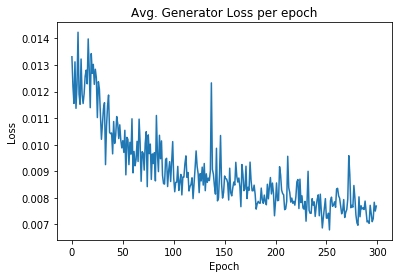

In [3]:
G_Loss = [0.013308471811324125, 0.012191696499940008, 0.011552892906668907, 0.013117418482336992, 0.011368141971179285, 0.012254761528068533, 0.014231169492510768, 0.01190334501065081, 0.011520131762954406, 0.01322371312659622, 0.011879748810315505, 0.01154955529064561, 0.011922283946963338, 0.012576678125769831, 0.0128065018026003, 0.01229005831895241, 0.013979305367004903, 0.012825216435206434, 0.011393109377046736, 0.013427677234479537, 0.012685405608499423, 0.013023027617794771, 0.012270949993787023, 0.012839041205006651, 0.012516397934329385, 0.01102168703568168, 0.012371457726112567, 0.01209242410492152, 0.011119883250406323, 0.01020251712014821, 0.010815497905326387, 0.011362000238150358, 0.011580400631064549, 0.009250311309782168, 0.010694125504232942, 0.011455431643601818, 0.011868180409849933, 0.010461591290756285, 0.01041369471757207, 0.010441733645081209, 0.009654974074219353, 0.010872874054475687, 0.010047446620883421, 0.010350644957701055, 0.011059342064836528, 0.010791535745956935, 0.010230577931700584, 0.010748131867245925, 0.010175022028076151, 0.0098796253996746, 0.010152263678416299, 0.00970853365744309, 0.010541964502384265, 0.00886546231689863, 0.010276159229300296, 0.010201525676335829, 0.00924951751367189, 0.010090591626843282, 0.009645043439425838, 0.010974819165809701, 0.008939684950358545, 0.009746326740326671, 0.00920725109744429, 0.009432185460076046, 0.010126757048807727, 0.009368104281408402, 0.01096218025078997, 0.010068626528372988, 0.008623350814256506, 0.009736604579957201, 0.009684350956231356, 0.00904378701816313, 0.010047154397664902, 0.010488922242851306, 0.008421358409104868, 0.010369175429611157, 0.009663578193867579, 0.010023037558421493, 0.008693487113244676, 0.00965315412497148, 0.00928827907841575, 0.009699642064709527, 0.008638887539855205, 0.01109960611036513, 0.009653096741142992, 0.00898735528375255, 0.01035426625632681, 0.00947154160278539, 0.010142398829727122, 0.00884444004332181, 0.008538060204688615, 0.008518019672677232, 0.009436124506561706, 0.009488617193128449, 0.008425141337987345, 0.009009417880733964, 0.009361645802079389, 0.008614976223422369, 0.009390329256420955, 0.01011683500779327, 0.008747199741192162, 0.008229897924563072, 0.008585856807185337, 0.008586894106216884, 0.00918468299486752, 0.008278125124440218, 0.008618863375061969, 0.008882034395258719, 0.008110709631776748, 0.008786824076863316, 0.008779313061968424, 0.009279609659764295, 0.00957938005090303, 0.00877223641621337, 0.008955200692289509, 0.008258790538238827, 0.008429399144467121, 0.00850538710297163, 0.008754163896082901, 0.007970140851490821, 0.008532600038355062, 0.009114914483895216, 0.009765591052322027, 0.009190380252548494, 0.008909336608097267, 0.008196007528604242, 0.008911462837907795, 0.00863702633214416, 0.009156430013438997, 0.008479821069243675, 0.009292582647661524, 0.008270211821024229, 0.008905202575066747, 0.0085833447999903, 0.008742496891257664, 0.00865091149113141, 0.009020718970180799, 0.012325784227189919, 0.009072902739668886, 0.008885221815823267, 0.008453755821392406, 0.008140808829436234, 0.009865662263036938, 0.007887078006945861, 0.00799548542010598, 0.008869169633932568, 0.01034601394921386, 0.008542703364122039, 0.007991265948318565, 0.008198996649492377, 0.008821487220508668, 0.008726356997697925, 0.008703869267434735, 0.00856671720238713, 0.007918936510686763, 0.009115347947420863, 0.00819385860513042, 0.008075513816535628, 0.008369650248399314, 0.008593333734897896, 0.008480274703373047, 0.009337777237136228, 0.008799599209063065, 0.00859373771546719, 0.008747149209763544, 0.008420126469670018, 0.007667997579749984, 0.00925338046081985, 0.008873766854327792, 0.008270137002303576, 0.008331895737113276, 0.009191064959353146, 0.007974138843128458, 0.008399194421363063, 0.00828400169062661, 0.009344730072092109, 0.008646573613999257, 0.008268122777420407, 0.008266980578870669, 0.008477837015137386, 0.008138011702491591, 0.007575799794091532, 0.00777150298973235, 0.007868857546321427, 0.007804040218373606, 0.007799349507501272, 0.008367968841048424, 0.00793296833212177, 0.0077944266015159275, 0.008103899474857219, 0.007848047822966085, 0.007740165182816175, 0.008512316701332262, 0.007963446108915377, 0.00841841069535197, 0.008764880889987883, 0.00814775439745669, 0.008555940440807415, 0.008178629906421217, 0.007326370297717707, 0.007842944587367432, 0.008560159489279613, 0.007893730726500507, 0.007906948192685377, 0.009172007885742156, 0.008869962321477942, 0.0082915072197405, 0.008162619169840278, 0.008113580749486572, 0.007555698459812751, 0.0075880882704708105, 0.007864733345728988, 0.009563910990643005, 0.008383679710289775, 0.008199074508156627, 0.007838425119019424, 0.007992778129409999, 0.007796021333003106, 0.007870158259902383, 0.007726216940500308, 0.008036721026583109, 0.008604309031992064, 0.00868951873582167, 0.007597670006507542, 0.008704559302035099, 0.007823282604658744, 0.008076472629909404, 0.007619493457993182, 0.007576113452184169, 0.00786737034174924, 0.007121394536904214, 0.007860136908566346, 0.008999426563580831, 0.007529027890122961, 0.007420598755658527, 0.00742023776518181, 0.007969474450510461, 0.007725414306720874, 0.007850190182895555, 0.007301177642560408, 0.007682956783392001, 0.007948492647653136, 0.00811331570589876, 0.007326357120570416, 0.008138278144566963, 0.0075329560719546865, 0.00686771883997911, 0.007265510734384103, 0.007602877043682383, 0.007970416182070039, 0.007236954761416807, 0.007238811555434949, 0.007423975646670442, 0.0067937287915265186, 0.007893861811899114, 0.00802678968650677, 0.007679454684936597, 0.0077307039918378, 0.00785118515622647, 0.007645096487152235, 0.008336251213768265, 0.008359105494843486, 0.008074179494239312, 0.007985486428660806, 0.007706117743315796, 0.007400282679009251, 0.0075194373668637125, 0.007935749002305481, 0.007261166437917079, 0.007454752147993228, 0.007556506455439376, 0.007959257339049751, 0.009586807837670979, 0.008863360287020138, 0.007628373549475024, 0.0077187773234133296, 0.007647861071357814, 0.00846584569827731, 0.007998381710009805, 0.007354991243531306, 0.0070591946514711405, 0.006968612911878154, 0.008037668366450817, 0.007287610721832607, 0.007702182400001523, 0.0075814077770337465, 0.0076249948103213686, 0.00756172692636028, 0.00787841648629789, 0.007498390037702241, 0.007092298160375018, 0.0071218185058872525, 0.00704124907545823, 0.007718993314580681, 0.007411000555924451, 0.007103722343211606, 0.007217280110150265, 0.007834591206434803, 0.007502644429429589, 0.0076920903089921925]

plt.plot(G_Loss)
plt.title('Avg. Generator Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

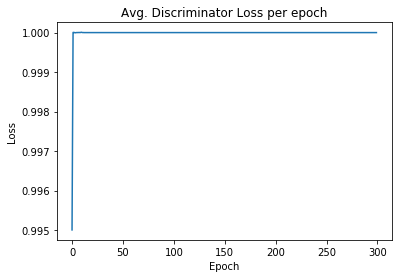

In [4]:
D_Loss = [0.9950058402617773, 1.0000040632486344, 1.0000040686130525, 0.9999942539135614, 1.0000000298023224, 1.000001999338468, 1.0000014875332515, 1.0000027136007945, 1.0000007768472037, 1.00000885506471, 1.000001833041509, 1.0000000673532485, 1.0000000196695327, 1.000000020066897, 1.0000000981489818, 1.0000000174840291, 1.0000000935792923, 1.0000000166893006, 0.9999999956289927, 0.9999999968210856, 1.0000000101327897, 1.000000044107437, 1.0000000820557275, 1.0000000375509261, 1.0000000097354254, 1.0000000721216202, 1.0000000796715418, 1.0000000204642614, 1.0000000184774398, 1.0000000005960465, 1.0000000218550364, 1.0000000043710073, 1.0000000099341075, 1.0000000031789145, 1.0000000530481339, 1.0000000063578287, 1.0000000011920929, 1.000000001390775, 1.0000000047683715, 0.9999999982118607, 0.9999999966224035, 0.9999999990065892, 1.0, 1.0, 1.0000000011920929, 1.000000001390775, 1.0000000005960465, 0.9999999992052714, 0.9999999998013178, 0.9999999996026357, 1.0000000001986822, 0.9999999996026357, 0.9999999988079071, 0.9999999992052714, 0.9999999996026357, 0.9999999998013178, 0.9999999972184499, 1.0000000033775966, 1.0, 1.0000000001986822, 1.0, 1.0, 1.0000000001986822, 1.0, 0.9999999998013178, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999998013178, 1.0, 1.0000000003973644, 1.0, 1.0, 1.0, 1.0, 0.9999999998013178, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000007947285, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

plt.plot(D_Loss)
plt.title('Avg. Discriminator Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Best Epoch = 15

Best MAE HR = 249.7

Best MSE HR = 377.6

Total Time taken for training = 16 hrs

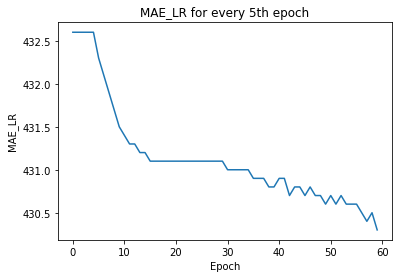

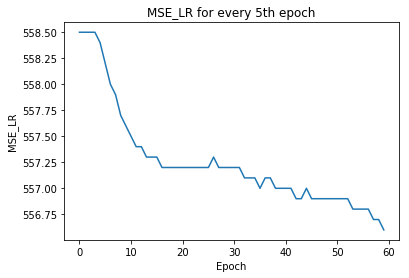

In [6]:
MAE_LR = [432.6,432.6,432.6,432.6,432.6,432.3,432.1,431.9,431.7,431.5,431.4,431.3,431.3,431.2,431.2,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.1,431.0,431.0,431.0,431.0,431.0,430.9,430.9,430.9,430.8,430.8,430.9,430.9,430.7,430.8,430.8,430.7,430.8,430.7,430.7,430.6,430.7,430.6,430.7,430.6,430.6,430.6,430.5,430.4,430.5,430.3]
MSE_LR = [558.5,558.5,558.5,558.5,558.4,558.2,558.0,557.9,557.7,557.6,557.5,557.4,557.4,557.3,557.3,557.3,557.2,557.2,557.2,557.2,557.2,557.2,557.2,557.2,557.2,557.2,557.3,557.2,557.2,557.2,557.2,557.2,557.1,557.1,557.1,557.0,557.1,557.1,557.0,557.0,557.0,557.0,556.9,556.9,557.0,556.9,556.9,556.9,556.9,556.9,556.9,556.9,556.9,556.8,556.8,556.8,556.8,556.7,556.7,556.6]

plt.plot(MAE_LR)
plt.title('MAE_LR for every 5th epoch')
plt.ylabel('MAE_LR')
plt.xlabel('Epoch')
plt.show()

plt.plot(MSE_LR)
plt.title('MSE_LR for every 5th epoch')
plt.ylabel('MSE_LR')
plt.xlabel('Epoch')
plt.show()

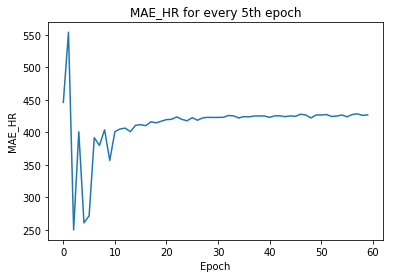

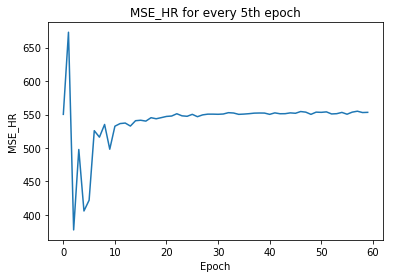

In [7]:
MAE_HR = [446.0,554.0,249.7,400.8,260.6,271.3,391.7,379.8,403.8,356.6,401.0,405.1,406.4,401.0,410.7,411.7,410.2,416.2,414.5,417.1,419.5,420.0,423.7,419.8,417.7,422.6,418.5,422.2,423.0,422.8,422.9,423.0,425.8,425.3,422.0,424.1,423.8,425.0,425.2,425.0,423.0,425.3,425.4,424.0,425.2,424.6,427.8,426.6,422.0,426.6,426.6,427.3,424.4,425.0,426.6,423.9,427.3,428.4,426.0,426.7]
MSE_HR = [550.3,673.0,377.6,497.8,405.9,422.0,525.9,516.2,535.2,498.2,532.6,536.5,537.3,532.8,540.8,541.5,540.2,545.3,543.7,545.4,547.2,547.8,551.2,548.1,547.4,550.3,546.8,549.5,550.6,550.6,550.4,550.8,552.8,552.3,550.3,550.7,551.3,552.1,552.3,552.2,550.3,552.5,551.2,551.3,552.5,551.9,554.5,553.6,550.3,553.6,553.3,554.0,550.9,551.3,553.2,550.5,553.6,555.0,553.0,553.3]

plt.plot(MAE_HR)
plt.title('MAE_HR for every 5th epoch')
plt.ylabel('MAE_HR')
plt.xlabel('Epoch')
plt.show()

plt.plot(MSE_HR)
plt.title('MSE_HR for every 5th epoch')
plt.ylabel('MSE_HR')
plt.xlabel('Epoch')
plt.show()

Example images generated by SRGAN after 300 epochs

For Best Epoch (15):

Comment - SR Images are little blurry/not sharp in over crowded situations


Next Steps - 

1. Try increasing learning rate
2. Train for more epochs. (Earlier SRGAN is trained for 100 epochs and ICC for 1000. Training time was = 6 + 18 hrs)
3. Giving more weight to Super Resolution loss (image_loss + perception_loss + adversarial_loss).
4. Evaluate possibility to optimize code to allow larger batch sizes
5. Reduce training time (Refer Amazon Research paper)

Suggestions - 

1. Use delete to free up memory
2. Try using simpler network to train the model (only the HR branch of the Model)